In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
import osmnx as ox
import geopandas as gpd
import networkx as nx

/usr/local/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
#load in the hospital sites data to be used to score potential viable locations
hospitals = pd.read_csv('/Users/muhammad-faaiz.shanawas/Documents/Live Projects/MCLP/data/cambridge_uni_hospital_sites.csv')
hospitals

Code                                               Name  \
0    A6B3B                    CUH AT MEADOWS COMMUNITY CENTRE   
1    A9J5N                              CUH AT ROSMINI CENTRE   
2    B1C9Z                          CUH AT SPECSAVERS ROYSTON   
3    B5D1I                         CUH AT DODDINGTON HOSPITAL   
4    C5Z7J  CAMBRIDGE BIOMEDICAL RESEARCH CENTRE - VALNEVA...   
..     ...                                                ...   
173  RGT98                 NUFFIELD HEALTH CAMBRIDGE HOSPITAL   
174  RGT99                                  ST MARY'S SURGERY   
175  T4O3M                            CUH AT COLCHESTER STARS   
176  T8C3T                     CUH AT ROYAL PAPWORTH HOSPITAL   
177  Z4M4Y                     CUH AT HUNTINGDON ROAD SURGERY   

    National Grouping High Level Health Geography         Address Line 1  \
0                 Y61                         QUE  1 ST. CATHARINES ROAD   
1                 Y61                         QUE        69A QUEENS ROAD   
2                 Y61                         QUE    27A-27B HIGH STREET   
3                 Y61                         QUE           BENWICK ROAD   
4                 Y61                         QUE             HILLS ROAD   
..                ...                         ...                    ...   
173               Y61                         QUE     4 TRUMPINGTON ROAD   
174               Y61                         QUE    37 ST. MARYS STREET   
175               Y61                         QUE        5A QUEEN STREET   
176               Y61                         QUE          PAPWORTH ROAD   
177               Y61                         QUE      1 HUNTINGDON ROAD   

                  Address Line 2 Address Line 3 Address Line 4  \
0                            NaN            NaN      CAMBRIDGE   
1                            NaN            NaN        WISBECH   
2                            NaN            NaN        ROYSTON   
3                     DODDINGTON            NaN          MARCH   
4                            NaN            NaN      CAMBRIDGE   
..                           ...            ...            ...   
173                          NaN            NaN      CAMBRIDGE   
174                          NaN            NaN            ELY   
175                          NaN            NaN     COLCHESTER   
176  CAMBRIDGE BIOMEDICAL CAMPUS            NaN      CAMBRIDGE   
177                          NaN            NaN      CAMBRIDGE   

     Address Line 5  Postcode  Open Date  Close Date  \
0               NaN   CB4 3XJ   20211001         NaN   
1               NaN  PE13 2PH   20220401         NaN   
2               NaN   SG8 9AA   20220401         NaN   
3               NaN  PE15 0UG   20210401         NaN   
4               NaN   CB2 0QQ   20210401         NaN   
..              ...       ...        ...         ...   
173  CAMBRIDGESHIRE   CB2 8AF   20121001         NaN   
174  CAMBRIDGESHIRE   CB7 4HF   20121001         NaN   
175             NaN   CO1 2PG   20210401         NaN   
176             NaN   CB2 0AY   20201001         NaN   
177             NaN   CB3 0DB   20210401         NaN   

    Organisation Sub-Type Code Parent Org Code  
0                          NaN             RGT  
1                          NaN             RGT  
2                          NaN             RGT  
3                          NaN             RGT  
4                          NaN             RGT  
..                         ...             ...  
173                        NaN             RGT  
174                        NaN             RGT  
175                        NaN             RGT  
176                        NaN             RGT  
177                        NaN             RGT  

[178 rows x 14 columns]

/usr/local/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


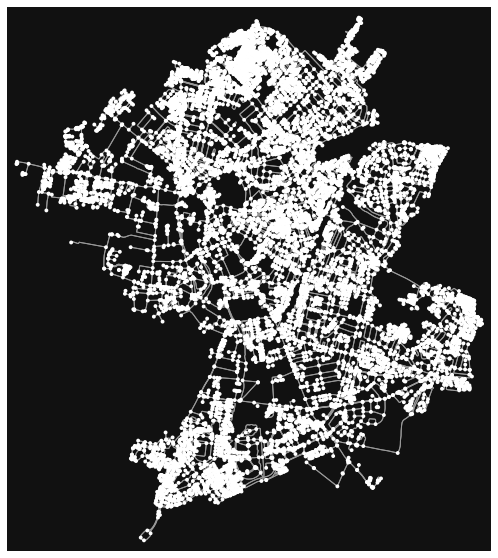

In [3]:

G = ox.graph.graph_from_place('Cambridge', simplify = True, network_type = 'walk')

# The following code can be run to decrease the time required to generate OSMnx network graphs.
# If a node cannot access at least 10% of other nodes it is removed from the network
#---------------------------------------------------------------------------------------

'''
remove_list = []
num_nodes = len(G.nodes)
for node in G.nodes:  
     reach = len(nx.descendants(G, node))
     if reach < num_nodes / 10:
         remove_list.append(node)
for node in remove_list:
     G.remove_node(node)
'''
#---------------------------------------------------------------------------------------
ox.plot_graph(G, figsize = (10,10));

In [4]:
nodes, edges = ox.graph_to_gdfs(G)
nodes

y         x          highway  street_count  ref  \
osmid                                                                  
104521       52.203550  0.123491  traffic_signals             3  NaN   
104522       52.204039  0.123043              NaN             3  NaN   
104523       52.205293  0.121804              NaN             3  NaN   
104524       52.205374  0.121364              NaN             3  NaN   
104525       52.206162  0.120605              NaN             3  NaN   
...                ...       ...              ...           ...  ...   
10564763741  52.174922  0.138307              NaN             1  NaN   
10569007912  52.210312  0.111860              NaN             3  NaN   
10569007915  52.210347  0.111937              NaN             3  NaN   
10569007920  52.210273  0.111904              NaN             3  NaN   
10569007939  52.210569  0.112653              NaN             1  NaN   

                             geometry  
osmid                                  
104521       POINT (0.12349 52.20355)  
104522       POINT (0.12304 52.20404)  
104523       POINT (0.12180 52.20529)  
104524       POINT (0.12136 52.20537)  
104525       POINT (0.12061 52.20616)  
...                               ...  
10564763741  POINT (0.13831 52.17492)  
10569007912  POINT (0.11186 52.21031)  
10569007915  POINT (0.11194 52.21035)  
10569007920  POINT (0.11190 52.21027)  
10569007939  POINT (0.11265 52.21057)  

[13007 rows x 6 columns]

In [8]:
print(target_address2)

4 TRUMPINGTON ROAD, Cambridge


In [5]:
#get the target addresses from the hospitals dataframe
target_index1 = 176
target_index2 = 173

target_address1 = hospitals['Address Line 1'][target_index1] + ', Cambridge'
target_address2 = hospitals['Address Line 1'][target_index2] + ', Cambridge'

#convert the addresses to lat long coordinates and get the nearest node on the graph
target_coords1 = ox.geocode(target_address1)
target_node1 = ox.get_nearest_node(G, target_coords1)

target_coords2 = ox.geocode(target_address2)
target_node2 = ox.get_nearest_node(G, target_coords2)

list_of_target_nodes = [target_node1, target_node2]

/usr/local/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/usr/local/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


In [6]:
#generate the random sample of 100 samples by first removing the target node location from the dataframe
nodes_df = nodes.copy()
nodes_df = nodes_df[~nodes_df.index.isin(list_of_target_nodes)] #get the dataframe of nodes that do not have any target nodes in them
nodes_sample = nodes_df[['y', 'x']].sample(n = 100, random_state = 1234)
nodes_sample

y         x
osmid                          
21591575    52.224083  0.110663
1488979824  52.199490  0.113681
7707784800  52.176200  0.135117
1547531121  52.233888  0.125579
1543118505  52.234267  0.133423
...               ...       ...
4772911473  52.172127  0.142657
1646109591  52.189417  0.130900
3268544973  52.214275  0.151990
5600570133  52.173395  0.141351
6562659966  52.186607  0.177447

[100 rows x 2 columns]

In [7]:
#creating a function to calculate a score from a list of lengths calculated from the target node to each of the 100 sample nodes
def create_score(list_of_lengths):
    score = 1000
    for l in list_of_lengths:
        deduction = (((l/1000)/4.5)*60) * 5 #get the length in km divide by speed 4.5 km/h then divide by 60 to get time in minutes
        score = score - deduction #decrement the score by the derivation of time taken to each of the 100 nodes
        return score

In [8]:
#define a function to calculate multiple shortest route lengths from the target node to each of the 100 sample nodes
def create_list_of_lengths(nodes_sample, target_node):
    list_of_lengths = []
    for node in nodes_sample.index:
        length = nx.shortest_path_length(G, source=node, target=target_node, weight='length') #calculate route from target node to sample node
        list_of_lengths.append(length) #append the length to the list
    
    return list_of_lengths
    

In [9]:
#run the function defined above to generate a list of lengths between the target nodes and sample nodes
#then generate the score for each and store them in a dictionary
target_scores = {}
target_scores['Site 1'] = create_score(create_list_of_lengths(nodes_sample, list_of_target_nodes[0]))
target_scores['Site 2'] = create_score(create_list_of_lengths(nodes_sample, list_of_target_nodes[1]))
target_scores

{'Site 1': 534.4081333333332, 'Site 2': 703.1283999999999}

In [10]:
#print the scores for each proposed target site
print('The score for Site 1: {} is {}'.format(hospitals['Name'].iloc[target_index1], target_scores['Site 1']))
print('The score for Site 2: {} is {}'.format(hospitals['Name'].iloc[target_index2], target_scores['Site 2']))

The score for Site 1: CUH AT ROYAL PAPWORTH HOSPITAL is 534.4081333333332
The score for Site 2: NUFFIELD HEALTH CAMBRIDGE HOSPITAL is 703.1283999999999


In [11]:
#initiate dictionary to store routes for all 100 nodes for each proposed site
target_to_nodes_routes = {}
target_node_names = ['Site1', 'Site2']

In [12]:
#generate multiple shortest routes for each site and store in dictionary for plotting
for site, target_node in zip(target_node_names, list_of_target_nodes):
    list_of_routes = []
    for node in nodes_sample.index:
        route = nx.shortest_path(G, source=node, target=target_node, weight='length') #calculate route from target node to sample node
        list_of_routes.append(route) #append the length to the list
    target_to_nodes_routes[site] = list_of_routes
    


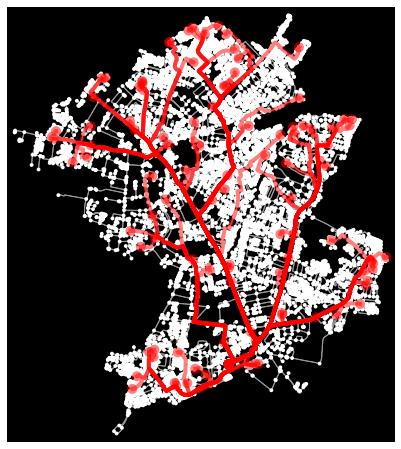

In [13]:
#plot the routes from Site 1 to all 100 sample nodes
fig, ax = ox.plot_graph_routes(G, target_to_nodes_routes['Site1'], route_linewidth=6, bgcolor='k')

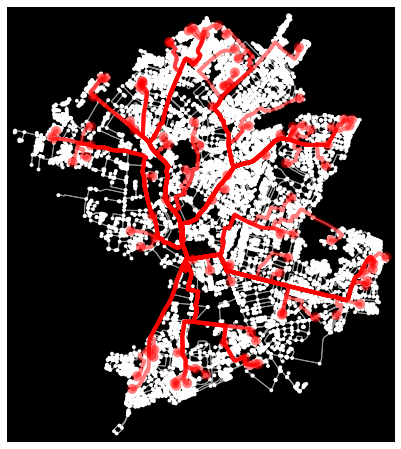

In [14]:
#plot the routes from Site 2 to all 100 sample nodes
fig, ax = ox.plot_graph_routes(G, target_to_nodes_routes['Site2'], route_linewidth=6, bgcolor='k')

In [15]:
import folium

In [16]:
site  = 'Site1'

In [19]:
target_scores

{'Site 1': 534.4081333333332, 'Site 2': 703.1283999999999}

In [32]:
route_map = ox.plot_route_folium(G, target_to_nodes_routes[site][0], route_color = '#ff0000', opacity = 0.5)
for route in target_to_nodes_routes[site][1:len(target_to_nodes_routes[site])]:
    route_map = ox.plot_route_folium(G, route, route_map = route_map, route_color = '#ff0000', opacity = 0.5)
iframe = folium.IFrame('<font face = "Arial"><b>{}:</b> {}. <br><br><b>{} Score:</b> {}</br></br></font>'.format(site, target_address1, site, target_scores['Site 1']))
popup = folium.Popup(iframe, min_width=200, max_width=200)
folium.Marker(location=target_coords1,
            popup = popup).add_to(route_map)

/usr/local/lib/python3.9/site-packages/osmnx/folium.py:126: UserWarning: `route_color` has been deprecated and will be removed: use kwargs instead
  warn("`route_color` has been deprecated and will be removed: use kwargs instead")
/usr/local/lib/python3.9/site-packages/osmnx/folium.py:126: UserWarning: `route_color` has been deprecated and will be removed: use kwargs instead
  warn("`route_color` has been deprecated and will be removed: use kwargs instead")
/usr/local/lib/python3.9/site-packages/osmnx/folium.py:126: UserWarning: `route_color` has been deprecated and will be removed: use kwargs instead
  warn("`route_color` has been deprecated and will be removed: use kwargs instead")
/usr/local/lib/python3.9/site-packages/osmnx/folium.py:126: UserWarning: `route_color` has been deprecated and will be removed: use kwargs instead
  warn("`route_color` has been deprecated and will be removed: use kwargs instead")
/usr/local/lib/python3.9/site-packages/osmnx/folium.py:126: UserWarning: `ro

In [33]:
route_map